In [7]:
from rdkit import Chem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')   
RDLogger.DisableLog('rdkit.*')

1) We load data

In [39]:
sdf_file = "data/datasetRaw/HLMC.sdf"
data = Chem.SDMolSupplier(sdf_file)
info = data[0].GetPropsAsDict()
info

{'CollectionName': 'emolecules',
 'Internal ID': 'Mol1',
 'LOG HLM_CLint (mL/min/kg)': 0.675687,
 'LOG MDR1-MDCK ER (B-A/A-B)': 1.493167,
 'LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound)': 0.991226,
 'LOG PLASMA PROTEIN BINDING (RAT) (% unbound)': 0.518514,
 'LOG RLM_CLint (mL/min/kg)': 1.392169,
 'LOG SOLUBILITY PH 6.8 (ug/mL)': 0.089905,
 'SMILES': 'CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H]3C[C@@H]3F)cnc12',
 'Vendor ID': 317714313,
 'ABUNDANCE': '91.92% at pH 7',
 'NETCHARGE': 0.08081}

2) We construct the dataframe

In [37]:
df = pd.DataFrame()
for i, mol in tqdm(enumerate(data)):
    try:
        smiles = Chem.MolToSmiles(mol)
        target = np.log(float(mol.GetProp("Ki (nM)").replace(">", "").replace("<", "")))
        if i == 0:
            print(target)
            print(smiles)
    except Exception as e:
        smiles = 'invalid'
        target = np.nan

    df.loc[i, "smiles"] = smiles
    df.loc[i, "target"] = target

# Filter invalid mols
mask = [True if Chem.MolFromSmiles(m) != None else False for m in df.loc[:, "smiles"]]
df = df[mask].reset_index(drop=True)
df["dataset"] = "ADRA1A"
df = df.reindex(['dataset', 'smiles', 'target'], axis=1)
df

246it [00:00, 1228.34it/s]

-3.506557897319982
C[C@@H]1C[NH+](C2CCCCC2)CCN1[C@@H](C)c1ccc(S(=O)(=O)c2ccc3c(c2)OCO3)cc1


1228it [00:00, 1307.86it/s]


,dataset,smiles,target
0,ADRA1A,C[C@@H]1C[NH+](C2CCCCC2)CCN1[C@@H](C)c1ccc(S(=...,-3.506558
1,ADRA1A,C=C(c1ccc([S@@+](O)c2ccc(OC)cc2)cc1)C1CC[NH+](...,-3.506558
2,ADRA1A,C[C@@H]1C[NH+](C2CCCCC2)CCN1[C@H](C)c1ccc(S(=O...,-3.506558
3,ADRA1A,CCOC(=O)N1CCC([NH+]2CCC(C3(c4ccc(S(=O)(=O)c5cc...,-3.506558
4,ADRA1A,CCCS(=O)(=O)N1CCC([NH+]2CCC(C3(c4ccc(S(=O)(=O)...,-3.473768
...,...,...,...
1105,ADRA1A,CCS(=O)(=O)N1CCC([NH+]2CCC(Oc3ccc(S(=O)(=O)c4c...,0.693147
1106,ADRA1A,CN(C)C1(C[NH2+]CCC2CCCCCC2)COc2ccccc2OC1,0.693147
1107,ADRA1A,CC(C)NC(=O)c1ccc(CC2CC[NH+](C3CCN(C(=O)c4ccc(F...,0.741937
1108,ADRA1A,C[NH+]1CCC=C(c2nsnc2SCCCF)C1,0.788457


Make sure there are no duplicates and if there are please remove them

In [11]:
print(f"This dataset consist of {df.shape[0]} molecular examples, where just {df['smiles'].nunique()} are unique")
# remove duplicates
df = df.drop_duplicates(subset=['smiles'], keep='first')
print(f"Our final dataset with no duplicates consist of {df.shape[0]}")
df.head(5)

This dataset consist of 2847 molecular examples, where just 1959 are unique
Our final dataset with no duplicates consist of 1959


,dataset,smiles,target
0,ADRA1A,COC(=O)C1=C(C)NC(=O)N(C(=O)NCCC[NH+]2CCN(c3ccc...,-4.605170
1,ADRA1A,COc1cc2[nH+]c(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,-4.605170
4,ADRA1A,COC(=O)C1=C(C)NC(=O)N(C(=O)NCCC[NH+]2CCN(c3ccc...,-3.912023
5,ADRA1A,CC(C)Oc1ccccc1N1CCN(Cc2cccc(C(=O)N3CCCCC3)c2)CC1,-3.912023
7,ADRA1A,CCOc1ccccc1OCC[NH2+][C@H](C)Cc1ccc(OC)c(S(N)(=...,-3.540459


3). We save it as a csv.

In [12]:
df.to_csv("data/ADRA1A.csv", index=False)

Then, this dataset can be used in further experiments, where we have to convert the smile in some specific representation, as can be a graph, a fingerprint, a descritor.

You can load it in another notebook using the following command:

In [15]:
dfLoaded = pd.read_csv("data/ADRA1A.csv")
print(f"Loaded {dfLoaded.shape[0]} molecules from csv")
dfLoaded.head(5)

Loaded 1959 molecules from csv


,dataset,smiles,target
0,ADRA1A,COC(=O)C1=C(C)NC(=O)N(C(=O)NCCC[NH+]2CCN(c3ccc...,-4.605170
1,ADRA1A,COc1cc2[nH+]c(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,-4.605170
2,ADRA1A,COC(=O)C1=C(C)NC(=O)N(C(=O)NCCC[NH+]2CCN(c3ccc...,-3.912023
3,ADRA1A,CC(C)Oc1ccccc1N1CCN(Cc2cccc(C(=O)N3CCCCC3)c2)CC1,-3.912023
4,ADRA1A,CCOc1ccccc1OCC[NH2+][C@H](C)Cc1ccc(OC)c(S(N)(=...,-3.540459


## Exploratory analysis

Text(0, 0.5, 'Count')

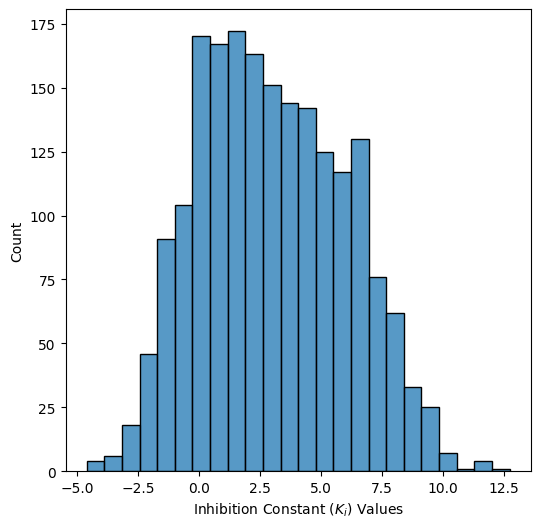

In [ ]:
# distribution of the target feature, that is the constant inhibitor K_i

plt.figure(figsize=(6,6))
sns.histplot(data=df, x='target', y=None, hue=None)
plt.xlabel('Inhibition Constant ($K_i$) Values')
plt.ylabel('Count')

We can visualize some molecules and their target value

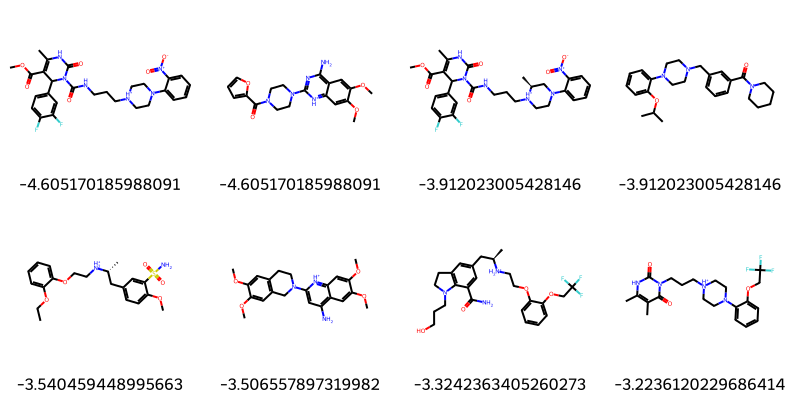

In [19]:
mols=[]
for i, smile in enumerate(df['smiles']):
    mol = Chem.MolFromSmiles(smile)
    mols.append(mol)

img=Chem.Draw.MolsToGridImage(mols[0:8], molsPerRow=4, subImgSize=(200,200),legends=[str(x) for x in df['target'][0:8]])
img

We see the atoms that are in our molecules and how much times they appears.

Unique atoms in the dataset: ['Br' 'C' 'Cl' 'F' 'H' 'I' 'N' 'O' 'S']
  Atoms  Count
0     C  46828
2     N   6410
1     O   5662
3     F   1043
4     S    472


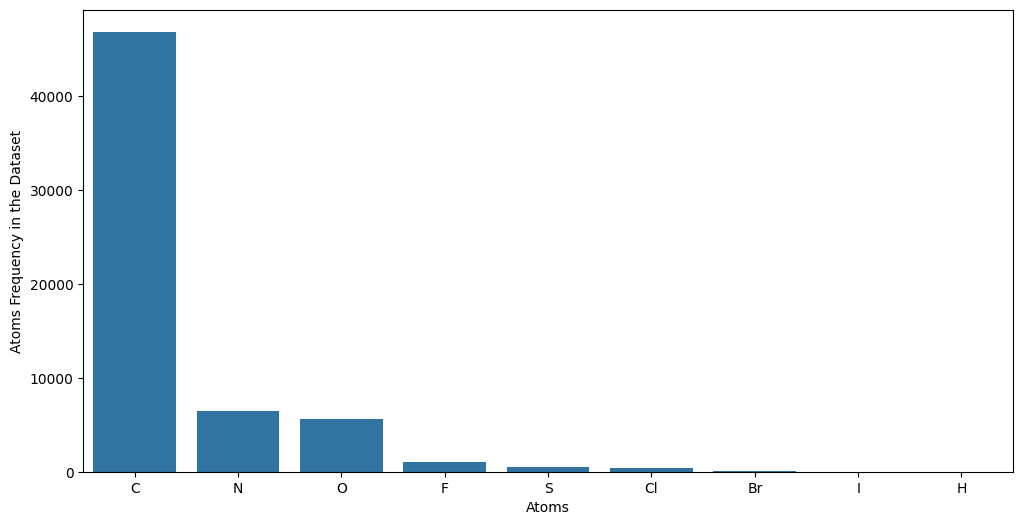

In [20]:
atom_list = []
for mol in mols:
  for atom in mol.GetAtoms():
    a = atom.GetSymbol()
    atom_list.append(a)

unique_atoms = np.unique(atom_list)
print(f"Unique atoms in the dataset: {unique_atoms}")

dictAtomsCount = dict(Counter(atom_list))
df_freq = pd.DataFrame(dictAtomsCount.items(), columns = ['Atoms', 'Count']).sort_values('Count', ascending=False)
print(df_freq.head(5))
plt.figure(figsize=(12,6))
sns.barplot(df_freq, x = 'Atoms', y = 'Count')
plt.ylabel('Atoms Frequency in the Dataset')
plt.show()

  Atoms  Count
1     C   1959
6     N   1959
7     O   1733
3     F    495
8     S    452


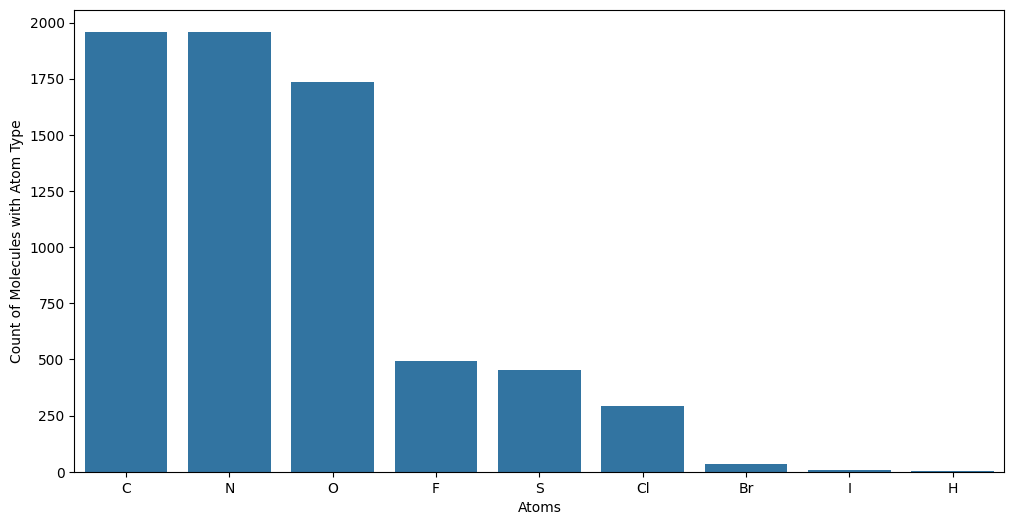

In [28]:
dict_2 = {}
for i in range(len(unique_atoms.tolist())):
  count=0
  for mol in mols:
    all_atoms = set()
    for atom in mol.GetAtoms():
      a = atom.GetSymbol()
      all_atoms.add(a)
    if unique_atoms.tolist()[i] in all_atoms:
      count+=1
    dict_2[unique_atoms.tolist()[i]] = count


df_freq_2 = pd.DataFrame(dict_2.items(), columns = ['Atoms', 'Count']).sort_values('Count', ascending=False)
print(df_freq_2.head(5))

plt.figure(figsize=(12,6))
sns.barplot(df_freq_2, x = 'Atoms', y = 'Count')
plt.ylabel('Count of Molecules with Atom Type')
plt.show()